# 面向视觉任务的transfomer

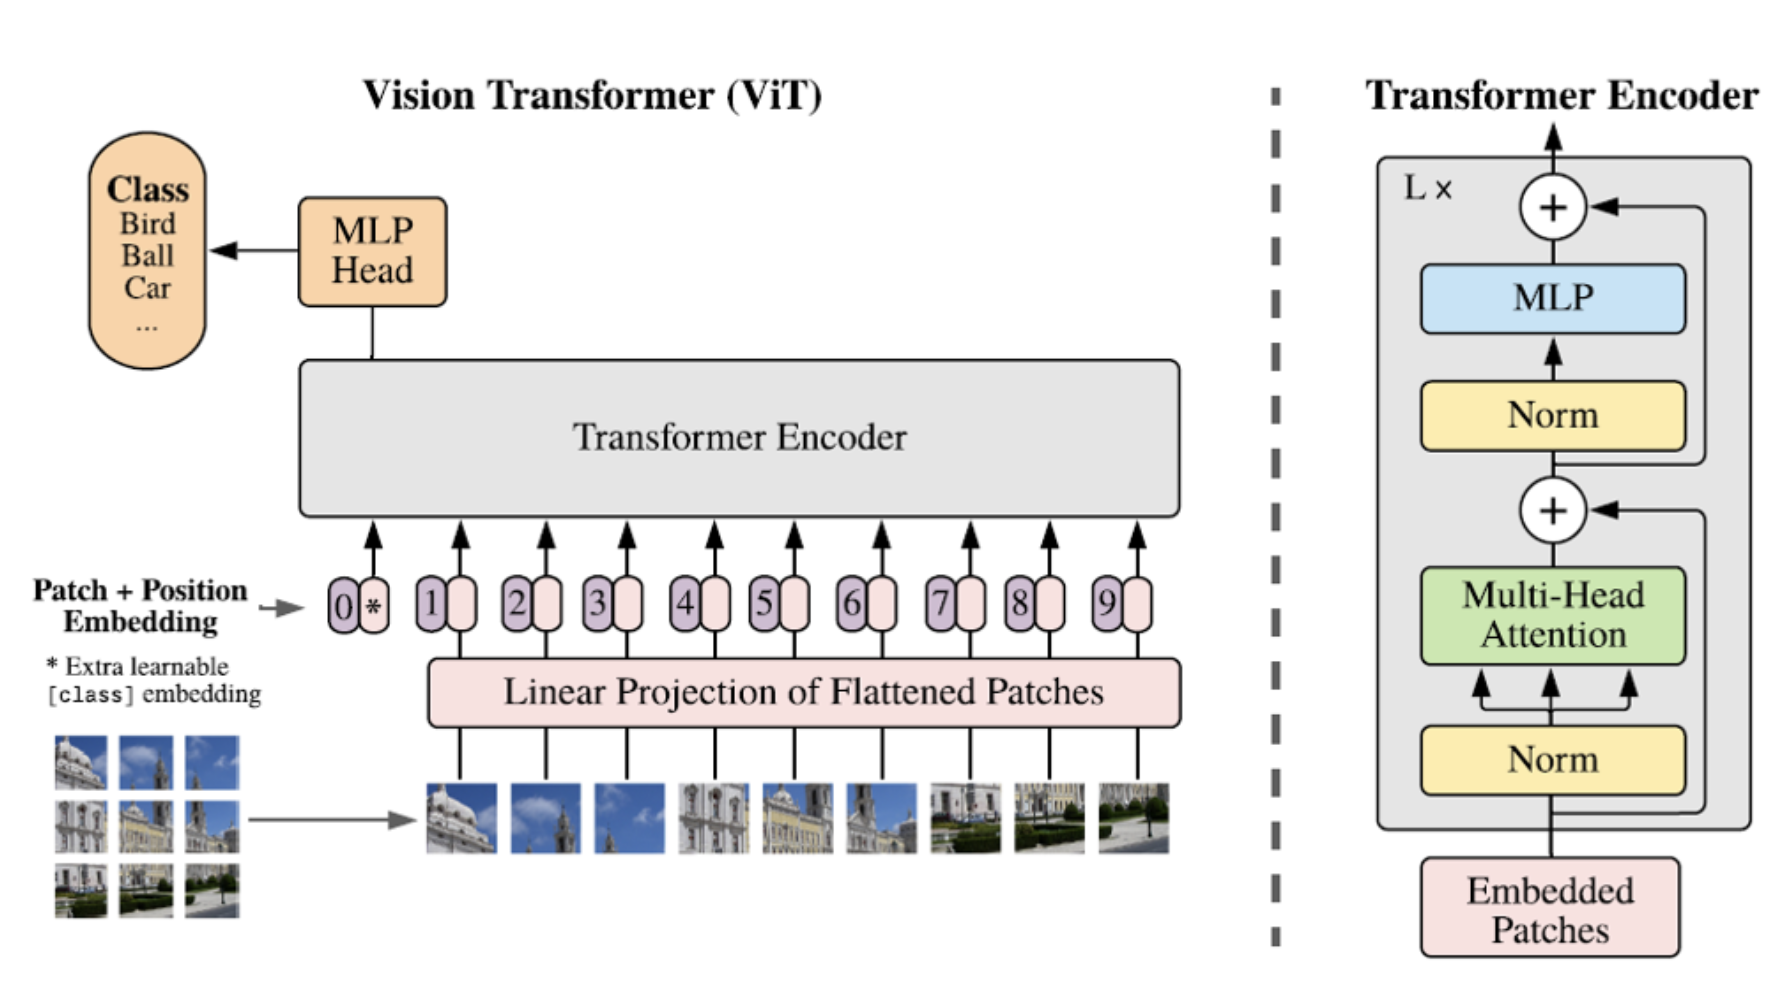

## Vision Transformer(ViT)在视觉任务中的局限性

* 需求数据量巨大

  CNN中是图像整体输入，并且经过多年的演变，发展出了多个不同的优化策略。从而在学习时能够在一定先验知识的前提下拟合数据。
  
  而transformer是将图像切割成若干较小的patch，并拉伸成向量。从而难以获得图像关联信息，缺少大量鲜艳知识。
  
  对此，需要从大量数据中学习这些先验知识。大量例子证明，在数据量足够充分的前提下，transformer能够获得比CNN更好的效果。
  
  但是在小规模数据中，由于无法有效学习到数据的先验知识，反而会比CNN更低。

* 计算量大
 
  事实上，transformer所包含的参数通常要大于CNN。
  
  其主要原因在于：transformer的模型结构就导致学习数据非常的难，因此需要更多的hidden layer来学习数据的本质分布。
  
  为了达到这一目的，通常要累加很多层transoformer结构，因此也更加的庞大。

### 在视觉领域中的具体困难

**1. 大尺寸图像计算量爆炸**

**2. 尺度固定为16*16**

## Swin transformer的解决之道：用CNN的精神

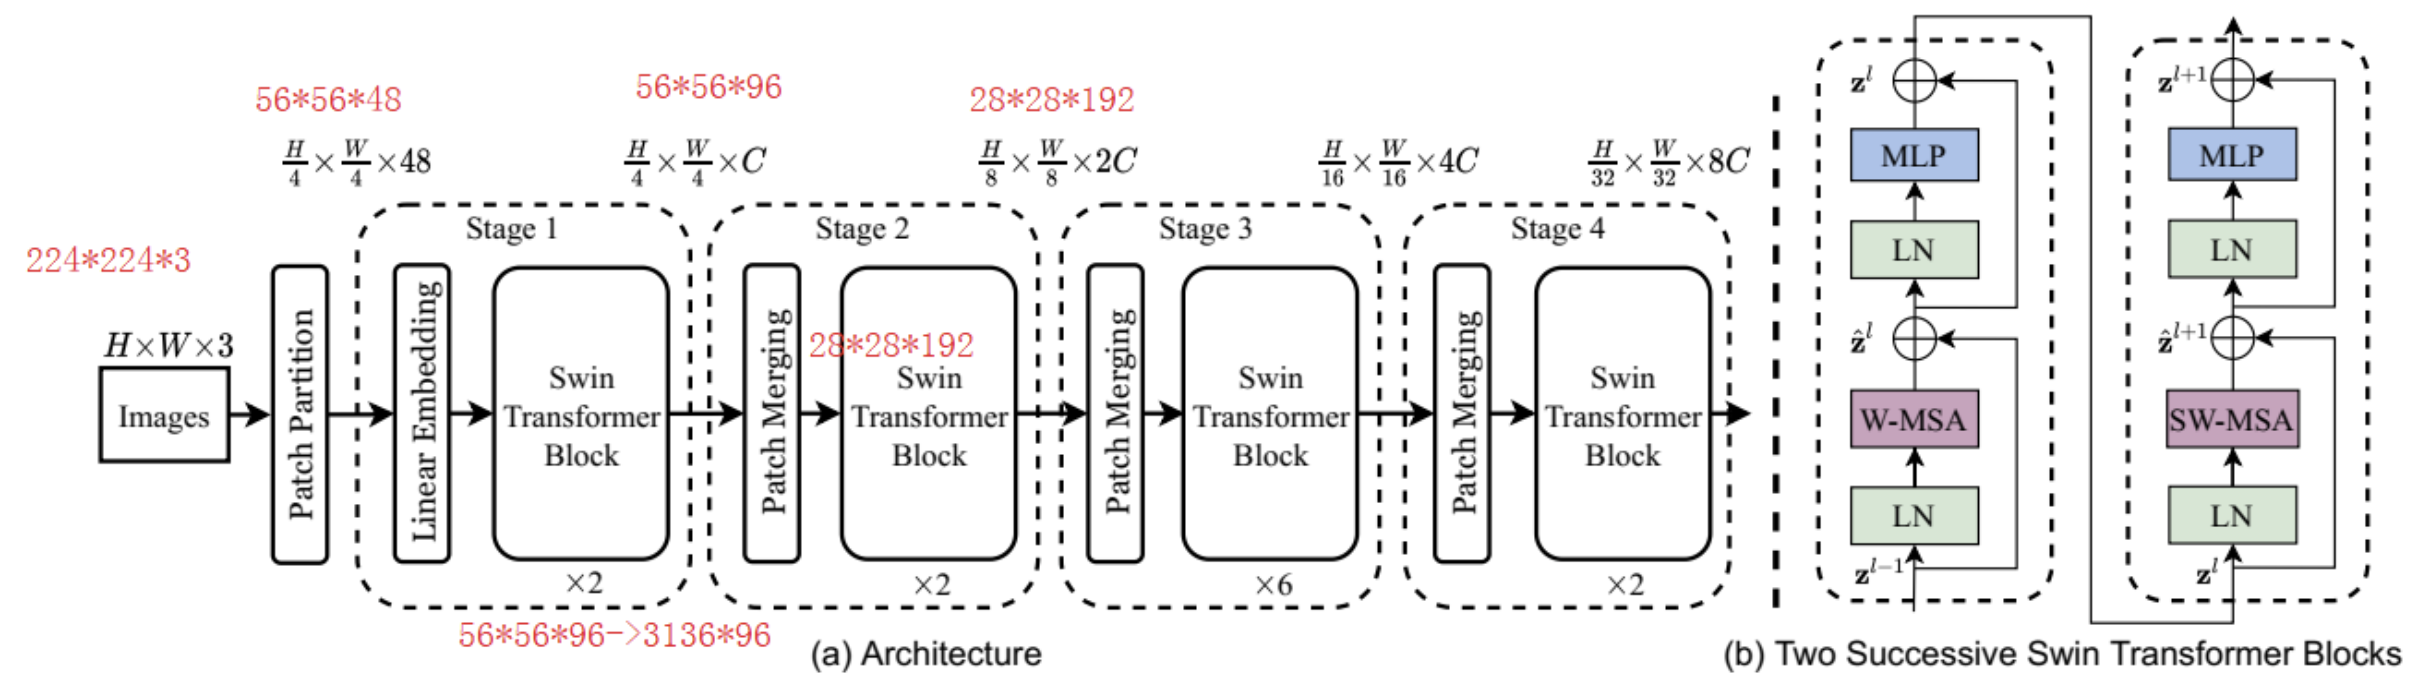

swin transformer用CNN的方式去构建网络，用卷积局部化的思想，基于self-attention的方式去搭建网络，实现图像编码

其中主要包含3个主要内容：

1. patch partition： 类似于池化

2. shift操作：令不同token之间有通信，减少计算量

3. 相对位置编码：进一步加强token之间的上下文关系

### patch partition

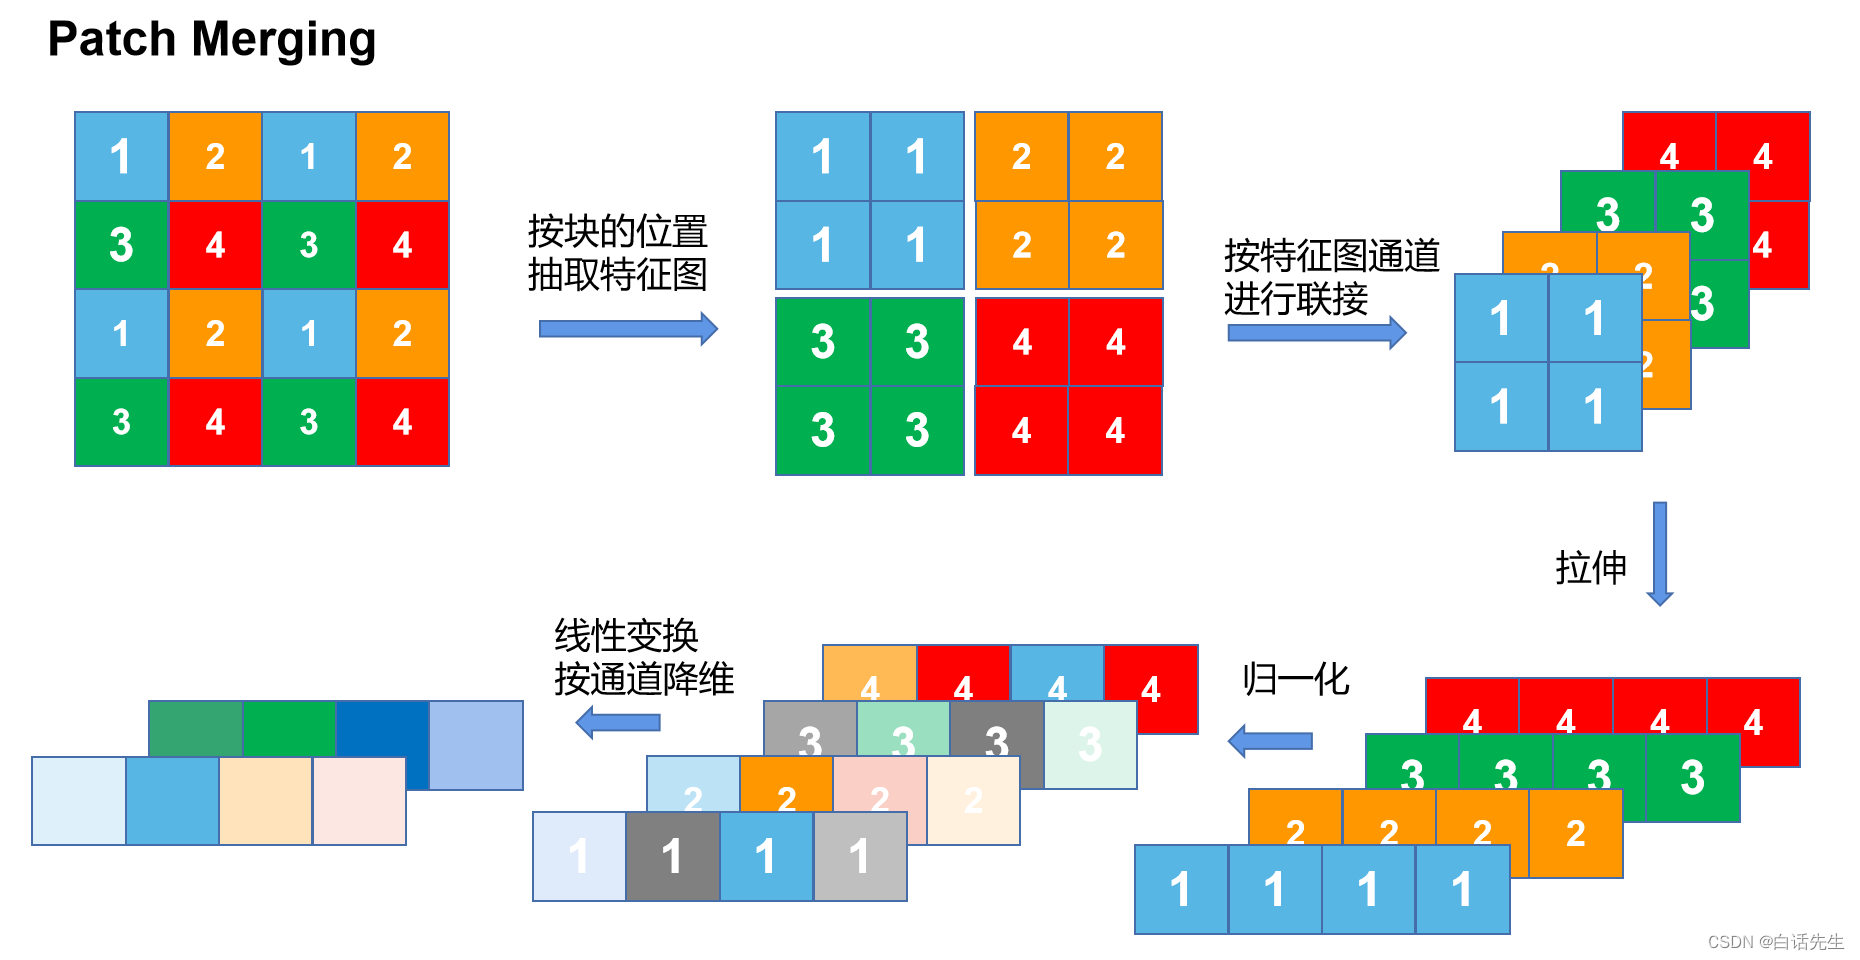

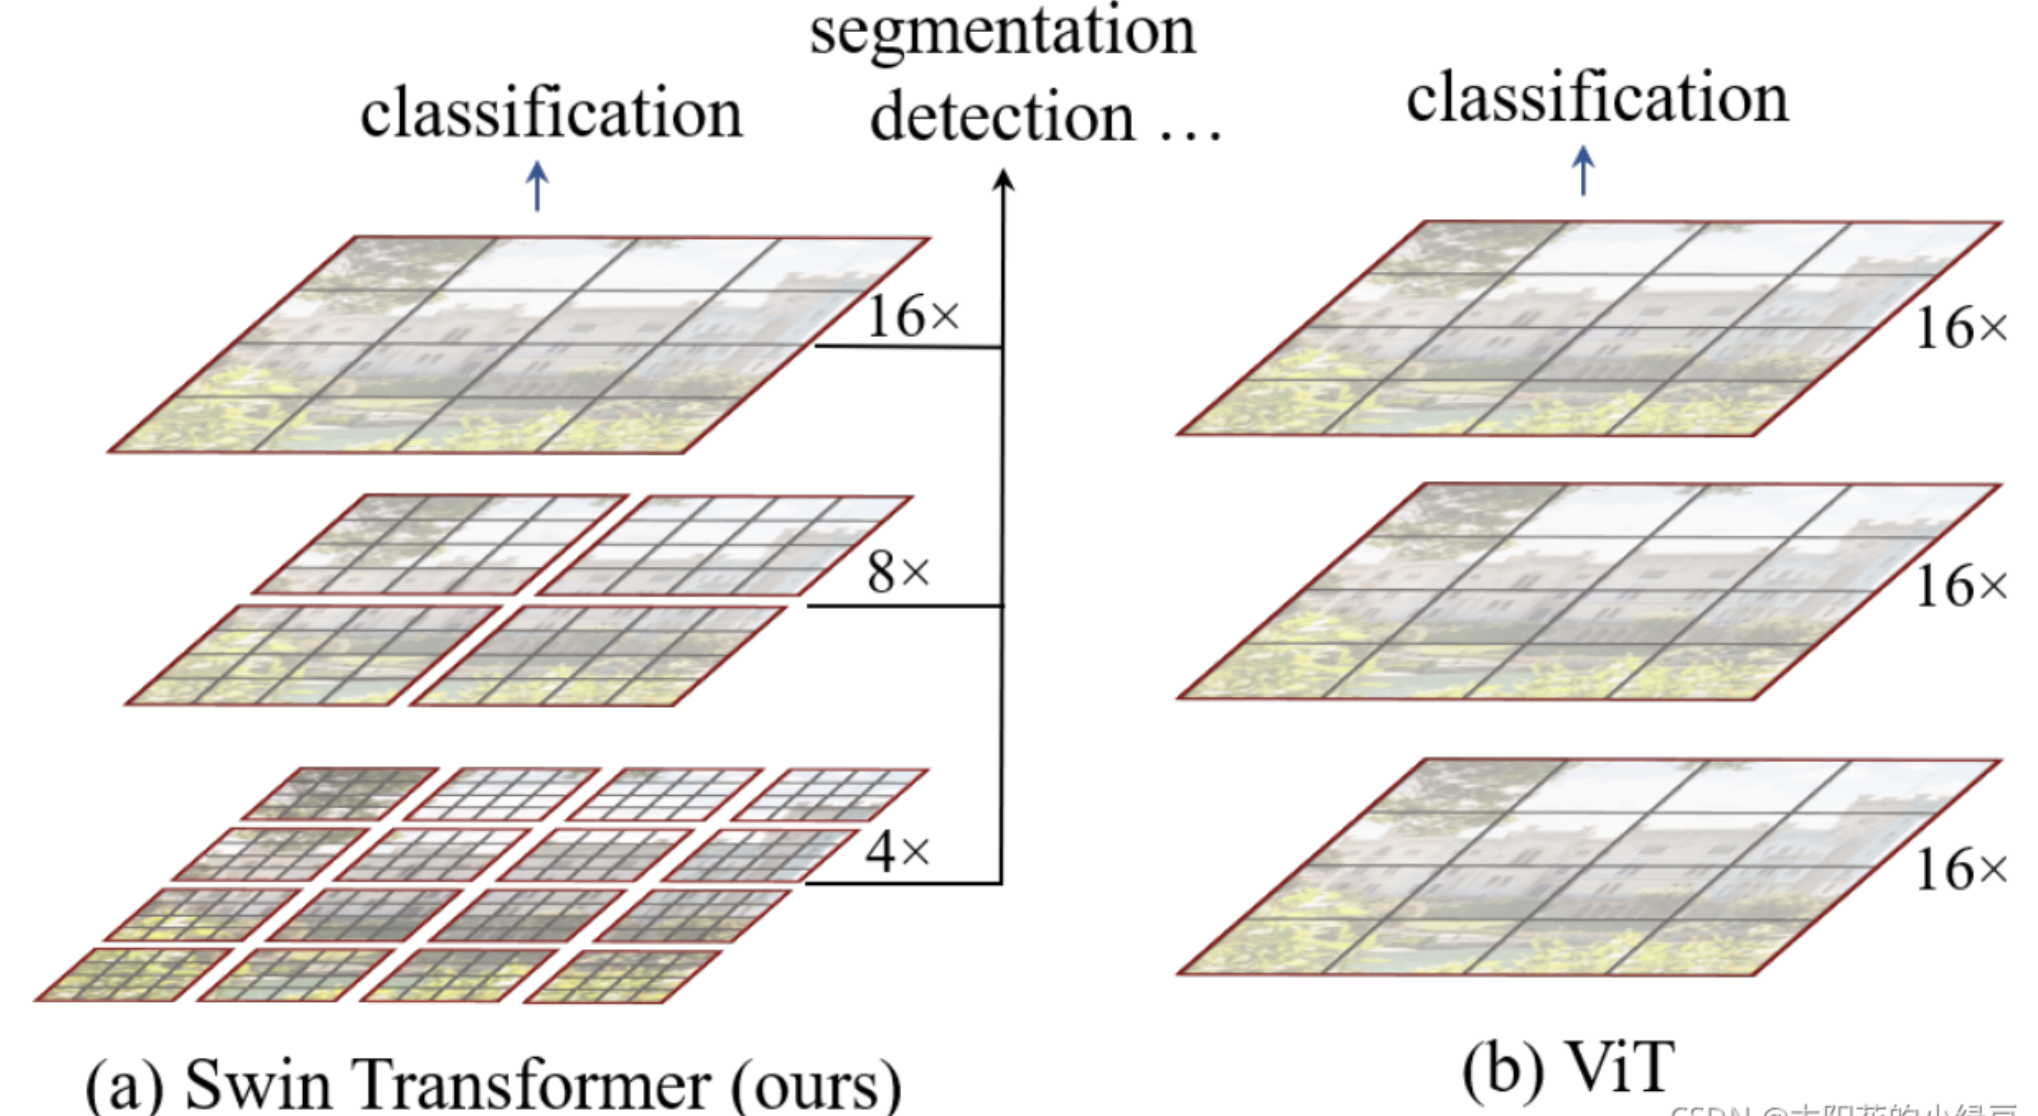

### MSA和WMSA

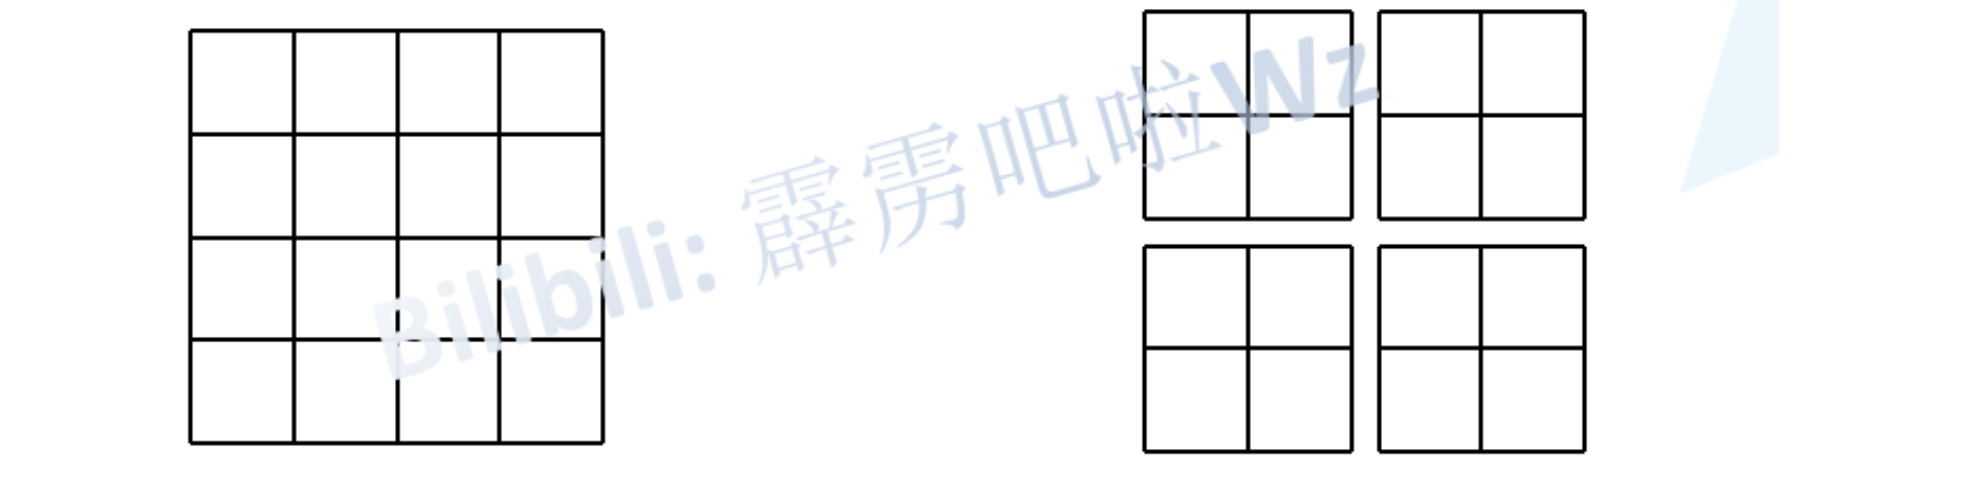

#### 复杂度比较

对于MSA的复杂度大约为：

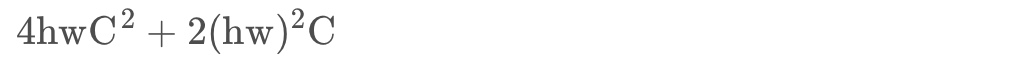

对于W MSA来说

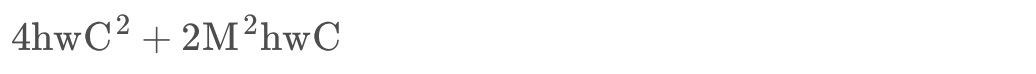

### shift操作

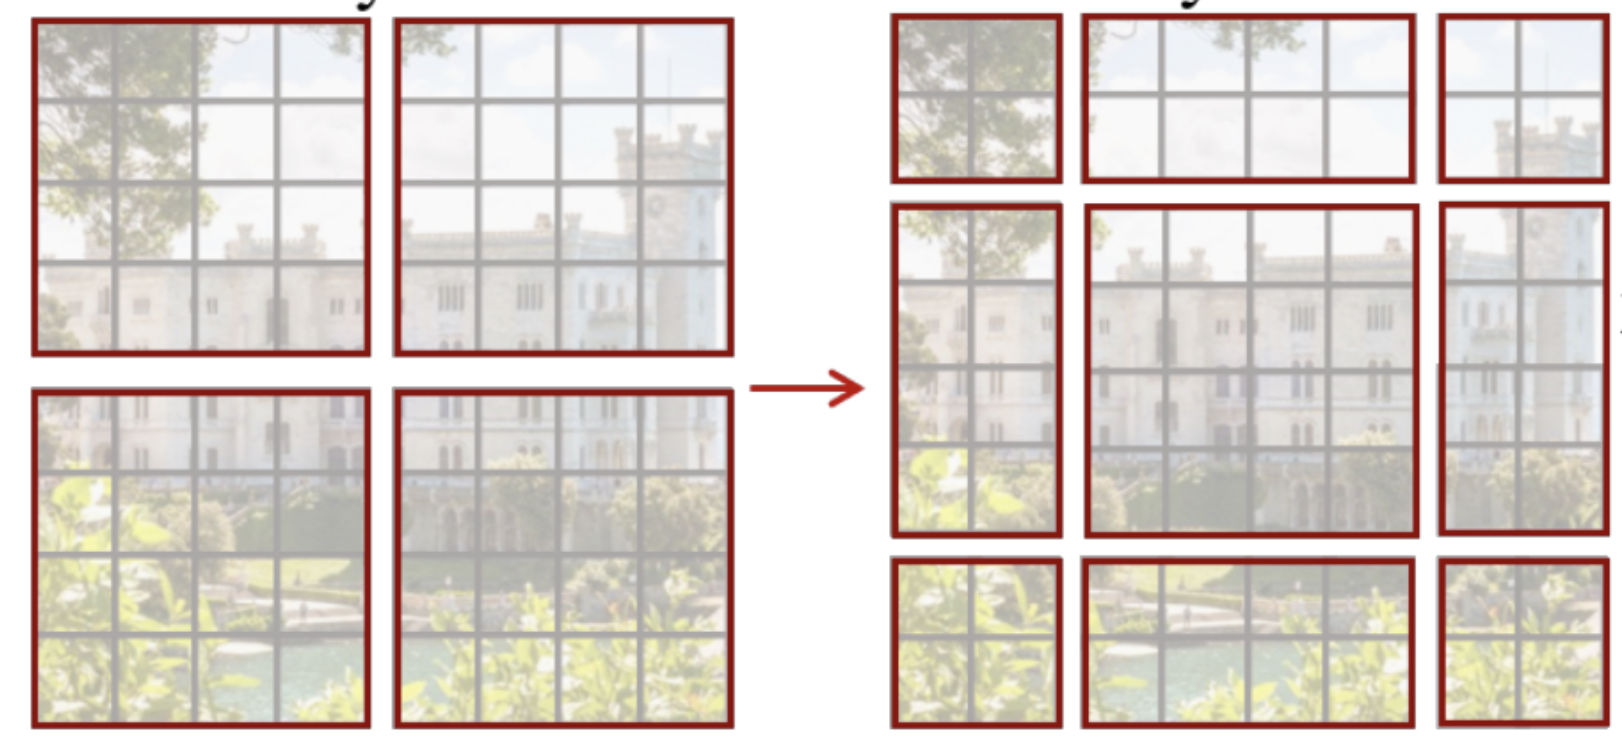

问题：原来4个token，现在变成9个token了

解决：挪动一些token

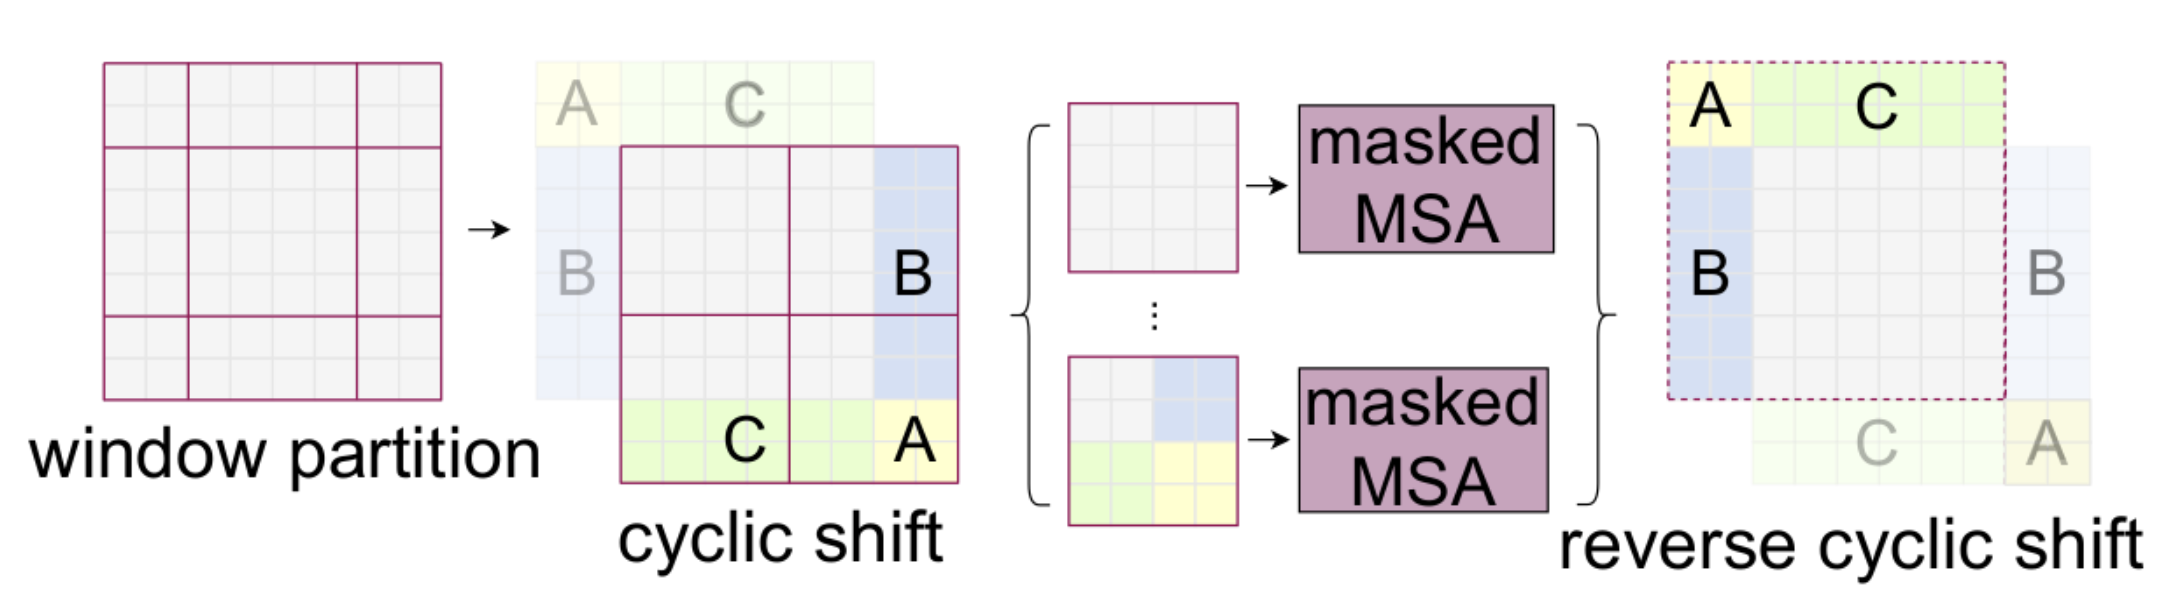

新问题：特征乱窜

解决： 加mask

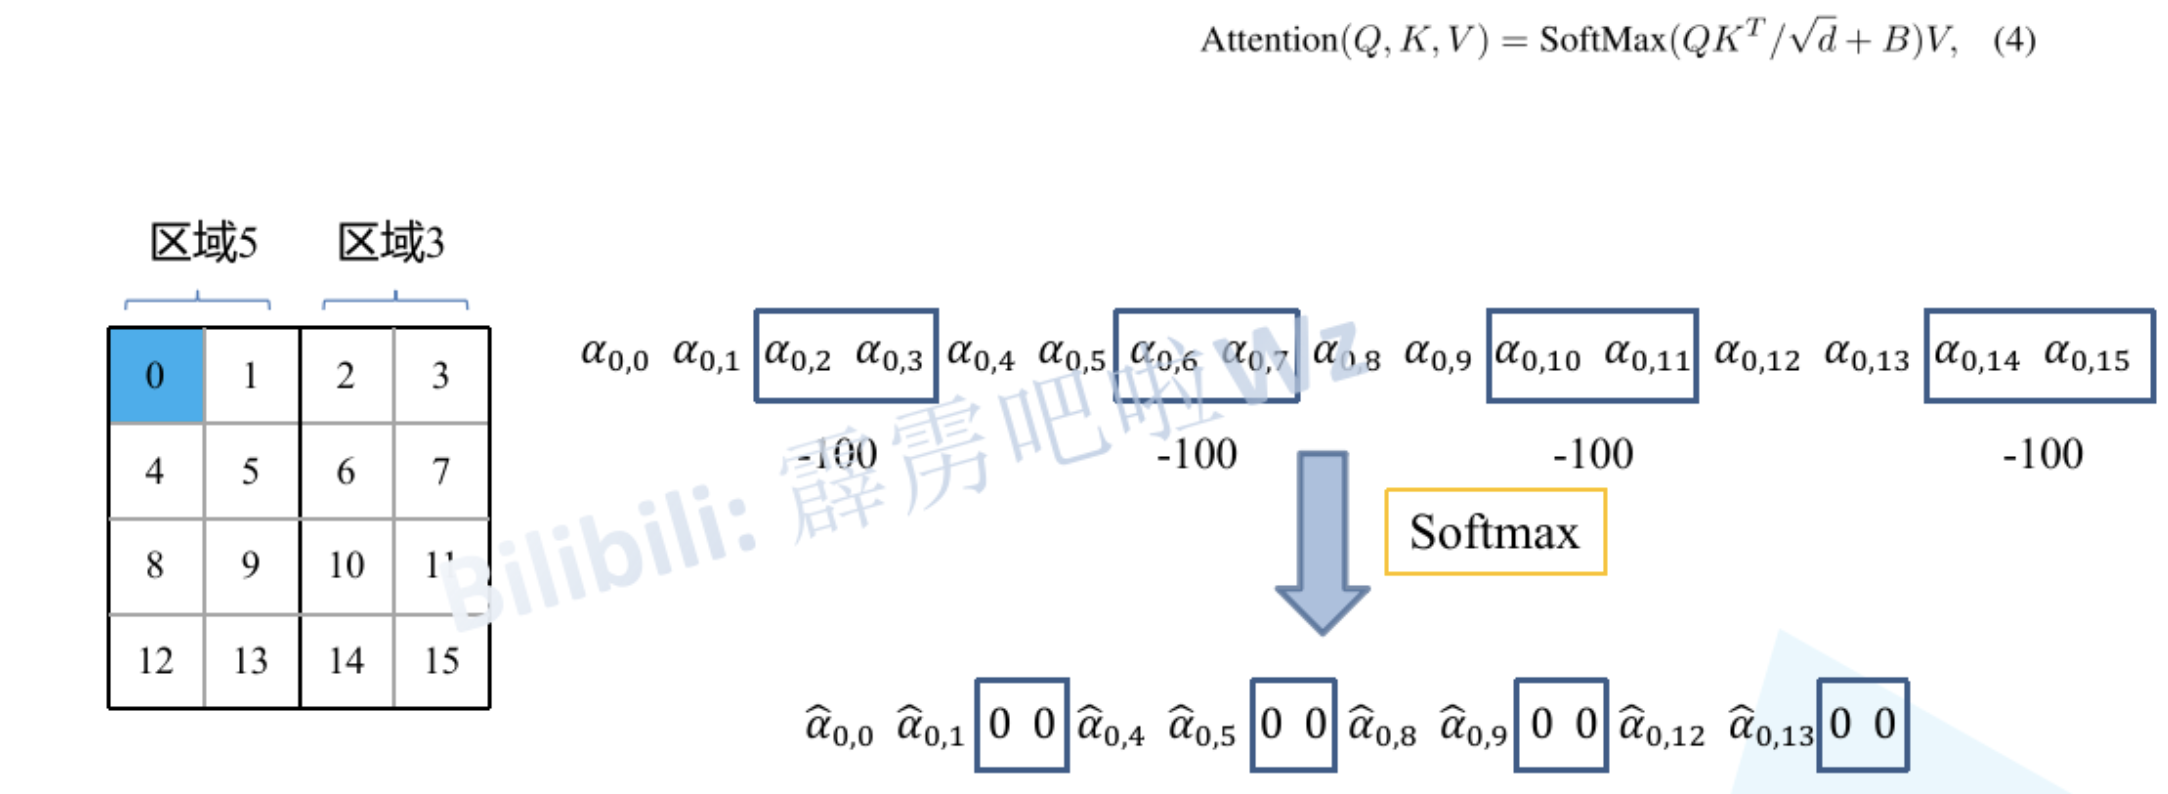

### 位置偏置

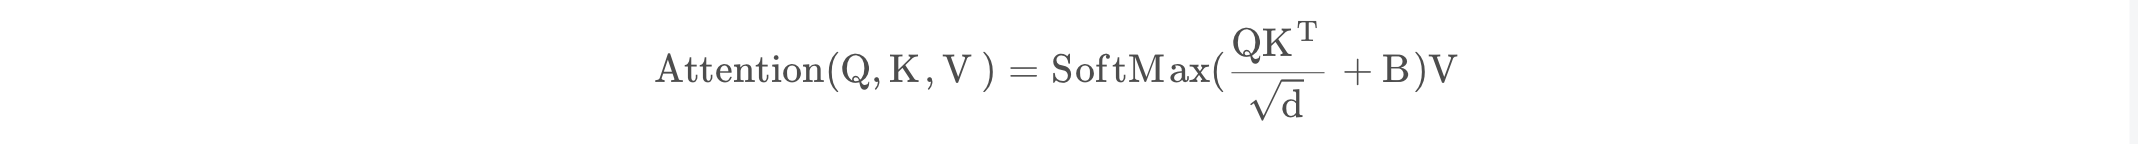

位置偏置就是将位置信息作为偏置，加入向量。

imagenet上加入位置偏置可以有3%的提升。

具体步骤为：

- 计算每个token的相对位置坐标

- 拉伸后合并成一个矩阵

- 合并成一维位置向量(全部加上M-1，行再乘以2M-1，行列相加)

- 可训练参数B作为偏置value的索引，查表将偏置作为归一化后的偏置信息

## 总体架构

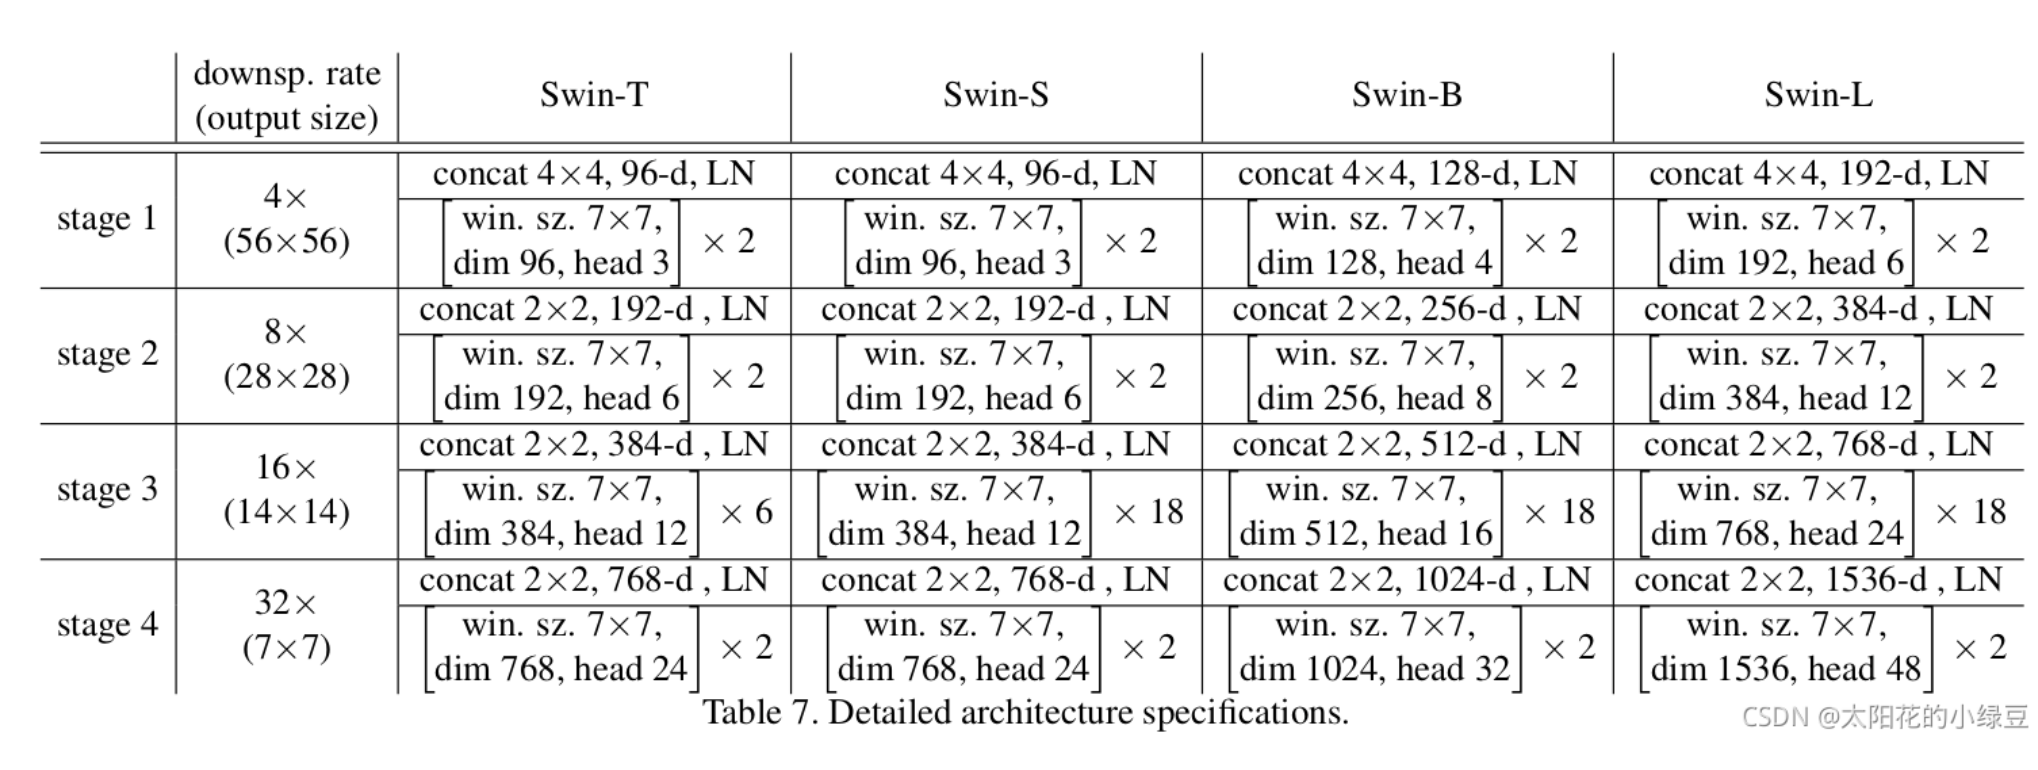